In [1]:
!pip install rdflib

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install pyvis

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 15.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.9 MB/s eta 0:00:00


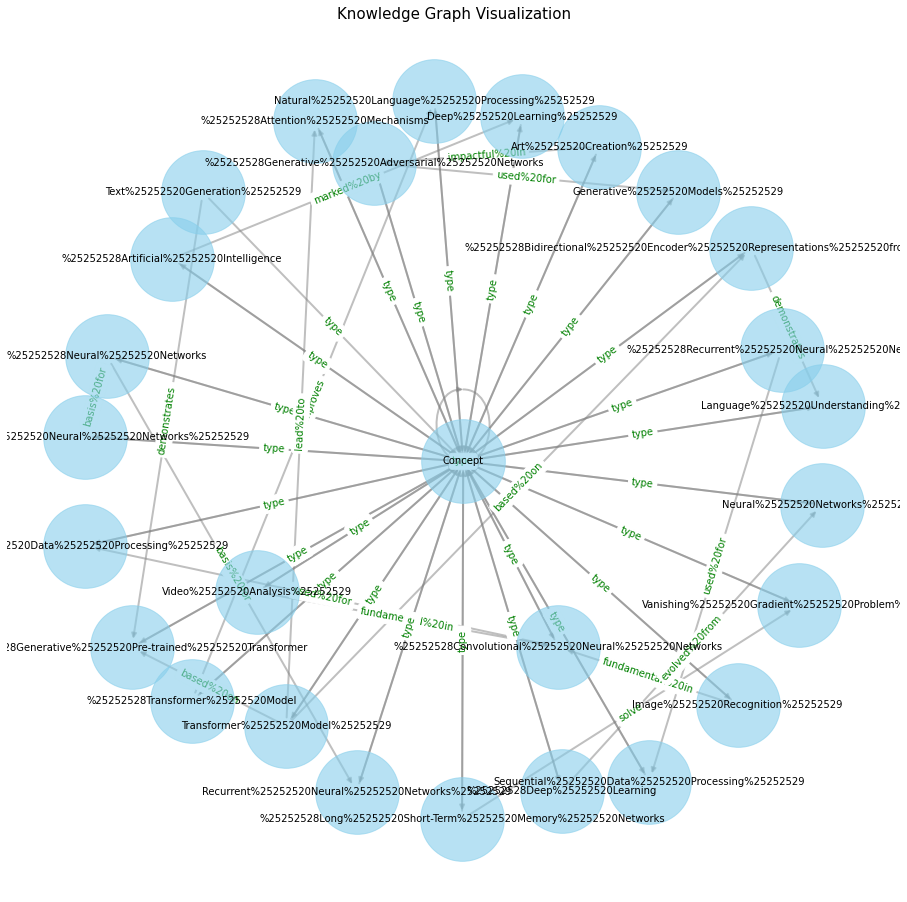

In [1]:
import rdflib
from rdflib import Graph
import matplotlib.pyplot as plt
import networkx as nx

# Load the Turtle file into an RDFlib Graph
g = Graph()
g.parse("data/kg_ai.ttl", format="turtle")

# Convert the RDFlib Graph into a NetworkX graph for visualization
G = nx.DiGraph()

for subject, predicate, obj in g:
    
    # Simplify URIs for better readability in the visualization
    sub_label = subject.split('#')[-1]
    pred_label = predicate.split('#')[-1]
    obj_label = obj.split('#')[-1] if isinstance(obj, rdflib.term.URIRef) else str(obj)
    #print(f"{sub_label} -> {pred_label} -> {obj_label}")
    
    # Add nodes and edges to the NetworkX graph
    G.add_node(sub_label.replace('%20', ' '))
    if "embedding" not in pred_label:
        G.add_node(obj_label.replace('%20', ' '))
        G.add_edge(sub_label.replace('%20', ' '), obj_label.replace('%20', ' '), label=pred_label)

# Draw the graph
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G, k=2)  # Positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color="skyblue", alpha=0.6)

# Edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color="gray")

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

plt.title('Knowledge Graph Visualization', size=15)
plt.axis('off')
plt.show()
